In [1]:
# Dependencies

import pandas as pd
import numpy as np
from config import fred_key
import requests
import json
import matplotlib.pyplot as plt
from pprint import pprint
import matplotlib.dates as mdates


In [2]:
# API Call
fred_url = "https://api.stlouisfed.org/fred/series/observations?"
fred_series_id= 'FEDFUNDS'
fred_key= fred_key

params = {"series_id": fred_series_id, "apiKey": fred_key}
query_url = f"{fred_url}series_id={fred_series_id}&api_key={fred_key}&file_type=json"
fred_response = requests.get(query_url, params=params).json()



## Interest Rate Data Frame

In [3]:
int_rate_df = pd.DataFrame(fred_response["observations"])
# Reduce to pertinent columns
int_rate_df = int_rate_df[["date", "value"]]
# write a CSV
int_rate_df.to_csv("output_data/int_rate.csv")
int_rate_df


,date,value
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.07
3,1954-10-01,0.85
4,1954-11-01,0.83
...,...,...
818,2022-09-01,2.56
819,2022-10-01,3.08
820,2022-11-01,3.78
821,2022-12-01,4.10


In [4]:
# API Call
fred_url = "https://api.stlouisfed.org/fred/series/observations?"
fred_series_id= 'UNRATE'
fred_key= fred_key
params = {"series_id": fred_series_id, "apiKey": fred_key}
query_url = f"{fred_url}series_id={fred_series_id}&api_key={fred_key}&file_type=json"
fred_response = requests.get(query_url, params=params).json()

## Unemployment Rate Data Frame

In [5]:
unemp_df = pd.DataFrame(fred_response["observations"])
# Reduce to pertinent columns
unemp_df = unemp_df[["date", "value"]]
# write a CSV
unemp_df.to_csv("output_data/unemp.csv")
unemp_df

,date,value
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
...,...,...
896,2022-09-01,3.5
897,2022-10-01,3.7
898,2022-11-01,3.6
899,2022-12-01,3.5


## Merged - Int Rate and Unemp

In [6]:
merged_int_unemp_df = pd.merge(int_rate_df, unemp_df, on='date')
# Rename the columns
merged_int_unemp_df = merged_int_unemp_df.rename(columns={"value_x": "Interest Rate", "value_y": "Unemployment Rate"})
# write a CSV
merged_int_unemp_df.to_csv("output_data/merged_int_unemp.csv")
merged_int_unemp_df

,date,Interest Rate,Unemployment Rate
0,1954-07-01,0.80,5.8
1,1954-08-01,1.22,6.0
2,1954-09-01,1.07,6.1
3,1954-10-01,0.85,5.7
4,1954-11-01,0.83,5.3
...,...,...,...
818,2022-09-01,2.56,3.5
819,2022-10-01,3.08,3.7
820,2022-11-01,3.78,3.6
821,2022-12-01,4.10,3.5


In [7]:
#setting the index to be the date column and making sure that it is in a date format for use elsewhere. 
merged_int_unemp_df = merged_int_unemp_df.set_index('date')
merged_int_unemp_df.index = pd.to_datetime(merged_int_unemp_df.index).date

In [8]:
merged_int_unemp_df

,Interest Rate,Unemployment Rate
1954-07-01,0.80,5.8
1954-08-01,1.22,6.0
1954-09-01,1.07,6.1
1954-10-01,0.85,5.7
1954-11-01,0.83,5.3
...,...,...
2022-09-01,2.56,3.5
2022-10-01,3.08,3.7
2022-11-01,3.78,3.6
2022-12-01,4.10,3.5


In [9]:
#Changing columns from objects to numeric data
merged_int_unemp_df['Interest Rate'] = pd.to_numeric(merged_int_unemp_df['Interest Rate'])
merged_int_unemp_df['Unemployment Rate'] = pd.to_numeric(merged_int_unemp_df['Unemployment Rate'])

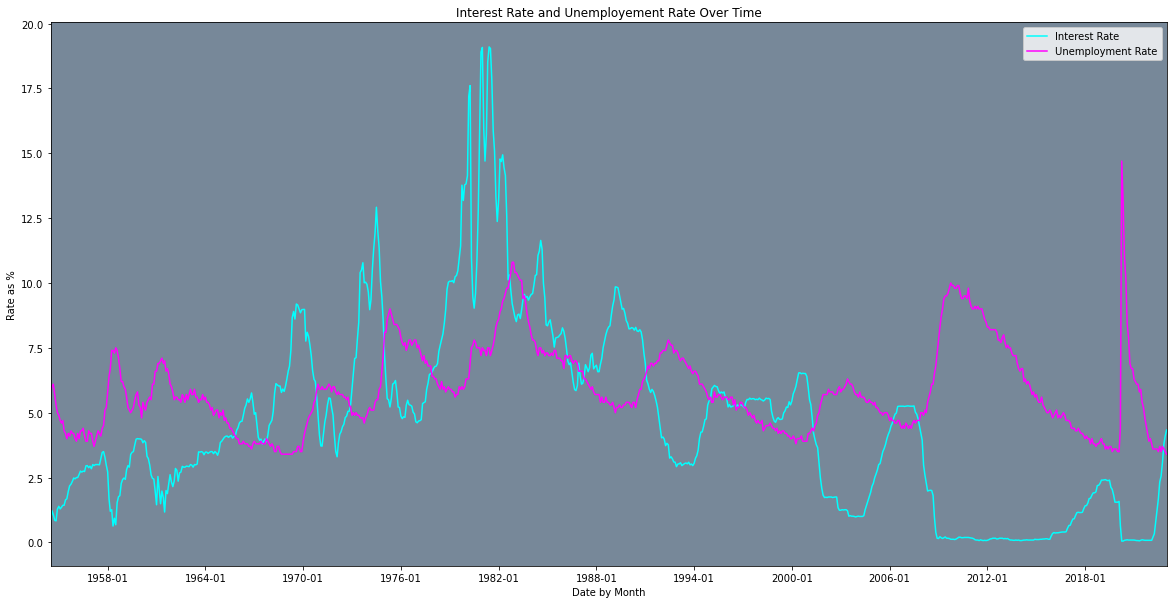

In [10]:
#Creating the first graph
graph1 = merged_int_unemp_df.plot(title="Interest Rate and Unemployement Rate Over Time", colormap='cool', figsize=(20,10))
graph1.set_xlabel("Date by Month")
graph1.set_ylabel("Rate as %")
graph1.set_facecolor("lightslategray")
graph1.xaxis.set_major_locator(mdates.MonthLocator(interval=72))
graph1.set_xlim([pd.Timestamp("1954-07-01"), pd.Timestamp("2023-01-01")])
graph1.get_figure().savefig('interest_vs_unemployment.svg')

In [11]:
# API Call for womens unemployment data
fred_url = "https://api.stlouisfed.org/fred/series/observations?"
fred_series_id= 'LNS14000002'
fred_key= fred_key


params = {"series_id": fred_series_id, "apiKey": fred_key}

query_url = f"{fred_url}series_id={fred_series_id}&api_key={fred_key}&file_type=json"
fred_response = requests.get(query_url, params=params).json()


In [12]:
wunemp_df = pd.DataFrame(fred_response["observations"])
# Reduce to pertinent columns
wunemp_df = wunemp_df[["date", "value"]]
# write a CSV
wunemp_df = wunemp_df.set_index("date")
wunemp_df= wunemp_df.rename(columns={"value":"Rate of Unemployment of Women"})
wunemp_df.to_csv("output_data/unemp.csv")
wunemp_df


,Rate of Unemployment of Women
date,
1948-01-01,3.3
1948-02-01,4.5
1948-03-01,4.4
1948-04-01,4.3
1948-05-01,3.7
...,...
2022-09-01,3.4
2022-10-01,3.7
2022-11-01,3.6


In [13]:
# API Call for mens unemployment data
fred_url = "https://api.stlouisfed.org/fred/series/observations?"
fred_series_id= 'LNS14000001'
fred_key= fred_key


params = {"series_id": fred_series_id, "apiKey": fred_key}

query_url = f"{fred_url}series_id={fred_series_id}&api_key={fred_key}&file_type=json"
fred_response = requests.get(query_url, params=params).json()

In [14]:
munemp_df = pd.DataFrame(fred_response["observations"])
# Reduce to pertinent columns
munemp_df = munemp_df[["date", "value"]]
# write a CSV
munemp_df = munemp_df.set_index("date")
munemp_df = munemp_df.rename(columns={"value":"Rate of Unemployment of Men"})
munemp_df.to_csv("output_data/unemp.csv")
munemp_df


,Rate of Unemployment of Men
date,
1948-01-01,3.4
1948-02-01,3.6
1948-03-01,3.8
1948-04-01,3.8
1948-05-01,3.5
...,...
2022-09-01,3.6
2022-10-01,3.7
2022-11-01,3.7


In [15]:
int_rate_df = int_rate_df.set_index("date")
int_rate_df = int_rate_df.rename(columns={"value":"Interest Rate"})

In [16]:
#Merging the three datasets together into one dataframe
mixedunemp_df = pd.merge(wunemp_df, munemp_df, left_index=True, right_index=True)
mixedunemp_df = pd.merge(mixedunemp_df, int_rate_df, left_index=True, right_index=True)
mixedunemp_df

,Rate of Unemployment of Women,Rate of Unemployment of Men,Interest Rate
date,,,
1954-07-01,6.3,5.6,0.80
1954-08-01,6.2,6,1.22
1954-09-01,6.4,6,1.07
1954-10-01,5.8,5.7,0.85
1954-11-01,5.6,5.2,0.83
...,...,...,...
2022-09-01,3.4,3.6,2.56
2022-10-01,3.7,3.7,3.08
2022-11-01,3.6,3.7,3.78


In [17]:
#Changing columns to be numeric
mixedunemp_df["Rate of Unemployment of Women"] = pd.to_numeric(mixedunemp_df["Rate of Unemployment of Women"])
mixedunemp_df["Rate of Unemployment of Men"]  = pd.to_numeric(mixedunemp_df["Rate of Unemployment of Men"])
mixedunemp_df["Interest Rate"] = pd.to_numeric(mixedunemp_df["Interest Rate"])
mixedunemp_df.index = pd.to_datetime(mixedunemp_df.index).date

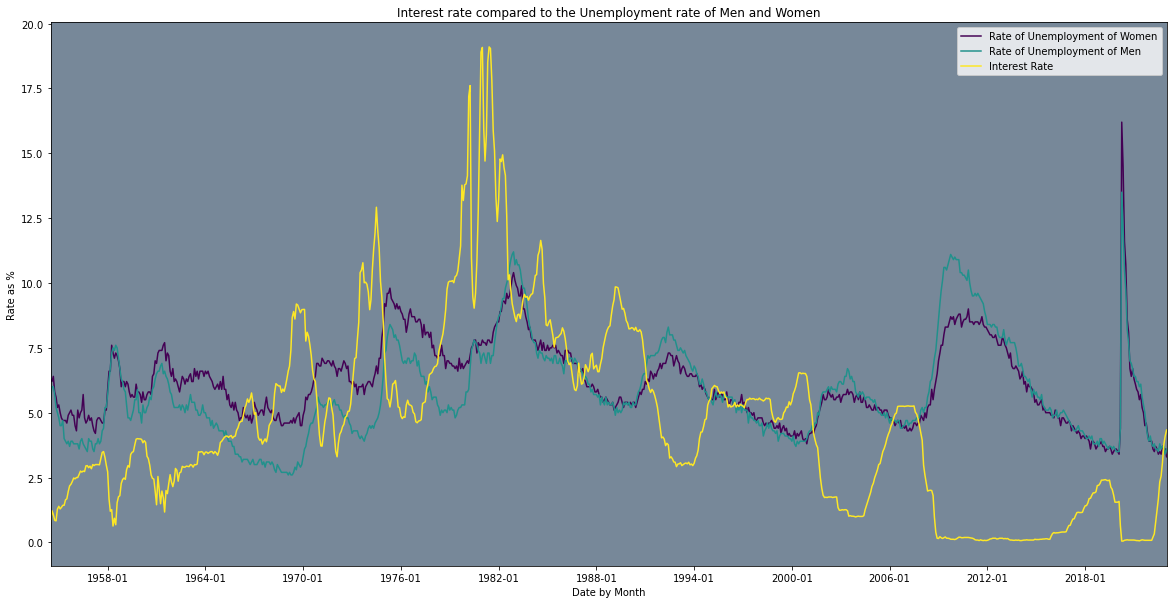

In [18]:
#creating the second graph
graph2 = mixedunemp_df.plot(title="Interest rate compared to the Unemployment rate of Men and Women", colormap='viridis', figsize=(20,10))
graph2.set_xlabel("Date by Month")
graph2.set_ylabel("Rate as %")
graph2.set_facecolor("lightslategray")
graph2.xaxis.set_major_locator(mdates.MonthLocator(interval=72))
graph2.set_xlim([pd.Timestamp("1954-07-01"), pd.Timestamp("2023-01-01")])
graph2.get_figure().savefig('interest_vs_men_vs_women.svg')